#PERKENALAN

> Memiliki buah hati atau anak atau keturunan pasti merupakan kebahagiaan bagi seorang ayah dan ibu. Dalam hal memiliki keturunan, peran ibu sangat penting dalam masa kehamilan. Ibu yang sehat juga memiliki janin yang sehat.

> Pada negara berkembang terutama keluarga yang tinggal di daerah pedesaan dengan kondisi ekonomi menegah kebawah kurang memiliki informasi dan kesadaran terhadap kesehatan pada ibu hamil. Hal tersebut menyebabkan banyaknya kematian pada ibu hamil.

> Pengecekan terhadap kesehatan ibu hamil wajib dilakukan secara berkala untuk melihat kesehatan ibu dan janin yang dikandungnya guna mengurangi risiko terjadinya kematian pada ibu hamil. PBB atau Persatuan Bangsa Bangsa juga memiliki target untuk meningkatkan kesehatan ibu hamil dan mengurangi risiko terjadinya kematian ibu dan anak pada tahun 2030. 

> Dari sebuah rumah sakit meminta untuk dibuatkan sistem untuk pengklasifikasian level risiko terhadap kesehatan ibu hamil agar memudahkan proses observasi dan penentuan level risiko kesehatan sebelum dilakuakn tindakan oleh dokter obgyn. 

> Saya Stefanus Bayu Waskito dari FTDS Remote 0185 memiliki data mengenai kehamilan yang dirilis pada tahun 2020 yang saya ambil dari UCI Dataset berdasarkan penelitian dari Marzia Ahmed. Dari data yang saya miliki saya ingin melakukan prediksi risiko kesehatan pada ibu hamil dapat membantu dalam menentukan langkah-langkah pencegahan atau penanganan yang tepat untuk mengurangi risiko komplikasi kesehatan pada ibu hamil dan mngurangi risiko kematian pada ibu hamil.

>

# IMPORT LIBRARY

In [1]:
# Import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import pickle
import joblib

In [2]:
import sklearn
sklearn.__version__

'1.2.2'

In [3]:
# Import data

data = pd.read_csv('https://raw.githubusercontent.com/stefanusbayuw/tesgit/main/Maternal%20Health%20Risk%20Data%20Set.csv')

> Data yang saya dapatkan dari UCI Dataset saya unggah ke github saya kemudian saya panggil untuk di read sebagai dataframe yang saya gunakan pada project ini.

In [4]:
# Head data

data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
# Tail data

data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
data.shape

(1014, 7)

> Data yang dimiliki terdiri dari 1014 baris data dan terdiri dari 7 fitur data.

In [7]:
# Tampilkan informasi data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
# Ubah Value pada RiskLevel

#data['RiskLevel'].replace(['low risk','mid risk', 'high risk'], [1,2,3], inplace=True)

In [9]:
# Tampilkan data setelah value RiskLevel diubah ke numerikal 

data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [10]:
# Ubah nama fitur BS menjadi BloodSugar

data = data.rename(columns={'BS': 'BloodSugar'})

> Mengubah nama fitur BS menjadi BloodSugar agar data yang dimiliki lebih mudah dimengerti.

In [11]:
# Tampilkan informasi data setelah value RiskLevel diubah ke numerikal 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BloodSugar   1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


> Data yang dimiliki semua memiliki tipe data numerikal dan hanya satu fitur yang memiliki tipe data kategorikal yaitu fitur `RiskLevel`.

> Fitur `RiskLevel` akan dijadikan sebagai target atau y dan  dilakukan encoding dengan label encoding pada label tersebut. 

In [12]:
# Cek duplikasi data

data.duplicated().sum()

562

> Terdapat 562 duplikasi data namun pada project ini duplikasi data diabaikan karena pada data yang dimiliki tidak memiliki primary key atau user_id yang dapat membedakan masing-masing data. Jika 562 duplikasi data dihapus menurut saya akan mengurangi jumlah data yang menyebabkan pada proses modeling tidak akan optimal.

In [13]:
data = data[data['HeartRate'] != 7]

In [14]:
data.shape

(1012, 7)

# EDA

In [15]:
# Tampilkan deskripsi data

data.describe()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,29.899209,113.184783,76.463439,8.727619,98.666403,74.434783
std,13.473560,18.419618,13.899372,3.296583,1.372421,7.521857
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


> Dari deskripsi data yang ada diketahui bahwa dari 1014 baris data yang dimiliki, usia paling rendah ibu hamil berusia 10 tahun dan usia paling tinggi berusia 70 tahun.

<BarContainer object of 11 artists>

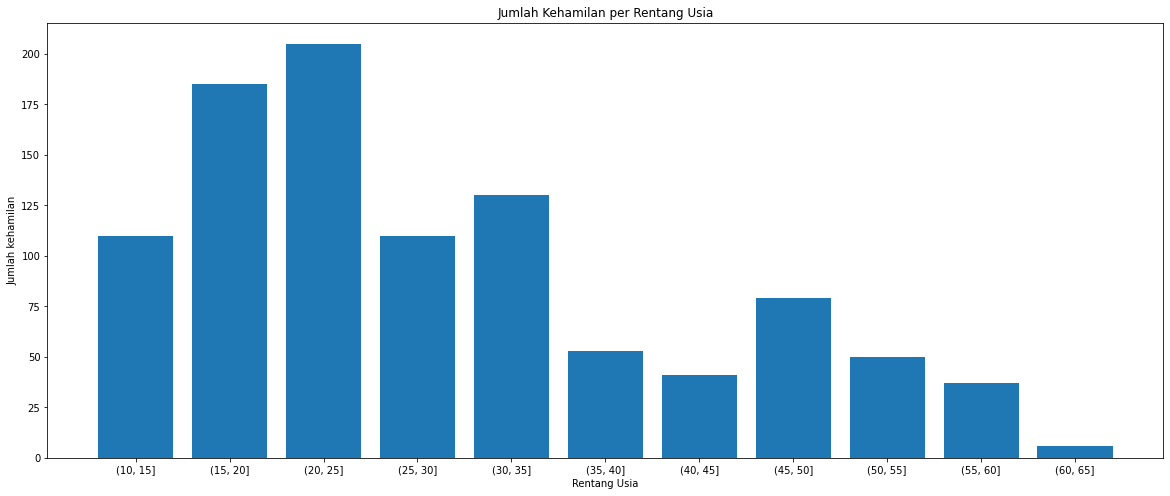

In [16]:
# Membuat bins dengan rentang usia setiap 5 tahun
bins = range(10, 70, 5)

# Menghitung jumlah ibu hamil dalam setiap 5 tahun
jumlah_ibu_hamil = pd.cut(data['Age'], bins=bins).value_counts().sort_index()

# Tampilkan plot usia

plt.figure(figsize = (20, 8))
plt.title('Jumlah Kehamilan per Rentang Usia')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah kehamilan')
plt.bar(jumlah_ibu_hamil.index.astype(str), jumlah_ibu_hamil)

> Dari informasi yang dimiliki terlihat bahwa pada rentang usia 20 sampai 25 tahun memiliki jumlah ibu hamil terbanyak dengan total 205 ibu hamil dan pada rentang 60 sampai 65 tahun terdapat 6 ibu hamil.

> Menurut hasil penelitian Dwi Rani Sukma dari bagian Obgyn Fakultas Kedokteran Univeristas Lampung pada Desember 2020, rentang usia terbaik untuk hamil berada pada rentang usia 20 sampai 35 tahun. Pada data dapat dilihat juga pada rentang usia 10 sampai 15 tahun terdapat 110 kehamilan. Wanita hamil pada usia muda akan memiliki beberapa resiko diantaranya keguguran, persalinan prematur, BBLR, kelainan bawaan, mudah terjadi infeksi, anemia pada kehamilan,keracunan kehamilan (gestosis) dan kematian.

> Referensi : https://juke.kedokteran.unila.ac.id/index.php/majority/article/viewFile/2840/2774

In [17]:
# Tampilkan label pada fitur RiskLevel

data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

> Data yang dimiliki memeliki 3 label pada fitur `RiskLevel` yaitu high risk, low risk dan mid risk. Label tersebut meupakan representasi dari tingkat risiko kesehatan pada ibu hamil.

In [18]:
# Hitung masing-masing label pada fitur RiskLevel

data['RiskLevel'].value_counts()

low risk     404
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

> Data yang dimiliki terdiri dari 406 ibu hamil memiliki label low risk, 336 ibu hamil memiliki label mid risk dan 272 ibu hamil memiliki label high risk.

> Terlihat dari informasi yang dimiliki, data cenderung balance.

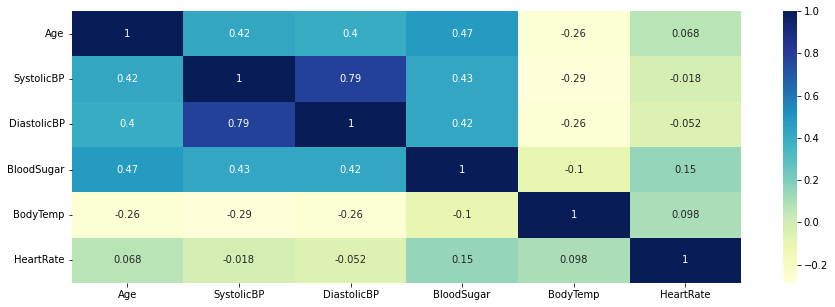

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

> Dapat dilihat bawa korelasi yang paling terlihat adalah ketika HeartRate memiliki korelasi positif dengan BodyTemp, ketika HeartRate tinggi maka suhu badan akan tinggi juga, begitu pula sebaliknya.


# FEATURE ENGINEERING

## CARDINALITY

In [20]:
# Cek Kardinalitas

print('Unique value pada fitur Age         : {}'.format(len(data.Age.unique())))
print('Unique value pada fitur SystolicBP  : {}'.format(len(data.SystolicBP.unique())))
print('Unique value pada fitur DiastolicBP : {}'.format(len(data.DiastolicBP.unique())))
print('Unique value pada fitur BloodSugar  : {}'.format(len(data.BloodSugar.unique())))
print('Unique value pada fitur Bodytemp    : {}'.format(len(data.BodyTemp.unique())))
print('Unique value pada fitur HeartRate   : {}'.format(len(data.HeartRate.unique())))
print('Unique value pada fitur RiskLevel   : {}'.format(len(data.RiskLevel.unique())))
print('Total baris data yang dimiliki      : {}'.format(len(data)))

Unique value pada fitur Age         : 50
Unique value pada fitur SystolicBP  : 19
Unique value pada fitur DiastolicBP : 16
Unique value pada fitur BloodSugar  : 29
Unique value pada fitur Bodytemp    : 8
Unique value pada fitur HeartRate   : 15
Unique value pada fitur RiskLevel   : 3
Total baris data yang dimiliki      : 1012


> Setelah dilakukan pengecekan unique value untuk melihat kardinalitas data, saya memilih untuk tidak mereduksi kardinalitas yang dimiliki. Alasan tidak melakukan reduksi kardinalitas dikarenakan nilai kardinalitasnya tidak terlalu tinggi.

## ENCODING DATA

> Data yang dimiliki terdiri dari 7 fitur data dengan 6 fitur numerikal dan 1 fitur kategorikal. Untuk mempermudah proses modelling, fitur data kategorikal harus diubah kedalam bentuk numerik.

> Merubah katergorikal kedalam numerikal biasa disebut encoding. Firut `RiskLevel` merupakan target (y) dan memiliki nilai berupa data kategorikal nominal. Data dengan tipe kategorikal nominal dapat dilakukan encoding dengan menggunakan One Hot Endoder maupun Label Encoder.

> Saya menggunakan label encoder.

In [21]:
data

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [22]:
label=LabelEncoder()

In [23]:
# Encoding fitru RiskLevel
data['RiskLevel'] = label.fit_transform(data['RiskLevel'])

In [24]:
data

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


> Dapat dilihat value pada `RiskLevel` sudah dilakukan encoding dengan label encoding.

> label high risk diubah ke  nilai 0, label low risk diubah ke  nilai 1, dan label med risk diubah ke  nilai 2 

> Setelah dilakukan encoding pada fitur `RiskLevle` kemudian dilakukan split data menjadi X dan y.

## SPLIT DATA

In [25]:
# Split data menjadi X dan y

X = data.drop(["RiskLevel"], axis=1)
y = data["RiskLevel"]

In [26]:
# Tampilkan X

X.sample(5)

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
762,33,115,65,7.0,98.0,70
443,32,120,90,6.8,98.0,70
84,21,90,65,6.9,98.0,76
760,21,90,60,6.9,98.0,86
903,32,120,90,7.9,98.0,70


> Terlihat bahwa data sample dari X sudah dipisahkan dari fitur `RiskLevel` yang dijadikan target atau y.

In [27]:
# split data train dan data test

X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.3, random_state=66)
print("X_train size :" ,X_train.shape)
print("X_test size :" ,X_test.shape)

X_train size : (708, 6)
X_test size : (304, 6)


In [28]:
X_train.head()

,Age,SystolicBP,DiastolicBP,BloodSugar,BodyTemp,HeartRate
846,36,120,90,7.00,98.0,82
850,12,100,50,6.40,98.0,70
459,32,120,90,6.80,98.0,70
5,23,140,80,7.01,98.0,70
101,25,120,80,6.80,98.0,66


> Telah dilakukan split data menjadi data train data test dengan perbandingan antara train dan test 80:20 setelah itu diacak dengan nilai random_state=66.

## HANDLING OUTLIERS

> Akan dilakukan pengecekan nilai skew untuk melihat adanya outliers pada X_train.

In [29]:
X_train.skew()

Age            0.756407
SystolicBP    -0.210959
DiastolicBP   -0.072078
BloodSugar     1.886622
BodyTemp       1.740923
HeartRate      0.048908
dtype: float64

> Dapat dilihat bahwa data X_train memiliki outliers namun dengan nilai yang kecil.

> Outliers tidak akan dihapus dengan alasan untuk menjaga keaslian data, distribusi data yng normal dan juga nilai skew yang kecil tidak berpengaruh pada data.

## NORMALISASI DATA

In [30]:
# Melakukan normalisasi menggunakan MinMaxScaler 

scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_final = scaler.transform(X_train)
X_test_final =  scaler.transform(X_test)

In [31]:
# Tampilkan X_train_final yang sudah discale

X_train_final

array([[0.46428571, 0.55555556, 0.80392157, 0.07692308, 0.        ,
        0.73333333],
       [0.03571429, 0.33333333, 0.01960784, 0.03076923, 0.        ,
        0.33333333],
       [0.39285714, 0.55555556, 0.80392157, 0.06153846, 0.        ,
        0.33333333],
       ...,
       [0.44642857, 0.33333333, 0.41176471, 0.38461538, 0.        ,
        0.        ],
       [0.23214286, 0.33333333, 0.70588235, 0.11538462, 0.        ,
        0.2       ],
       [0.53571429, 0.77777778, 1.        , 0.92307692, 0.        ,
        1.        ]])

In [32]:
# Tampilkan X_test_final yang sudah discale

X_test_final

array([[0.125     , 0.16666667, 0.21568627, 0.23076923, 0.8       ,
        0.86666667],
       [0.53571429, 1.        , 1.        , 1.        , 0.        ,
        0.56666667],
       [0.08928571, 0.55555556, 0.60784314, 0.11538462, 0.        ,
        0.33333333],
       ...,
       [0.80357143, 0.33333333, 0.31372549, 0.13846154, 0.        ,
        0.2       ],
       [0.16071429, 0.55555556, 0.60784314, 0.07692308, 0.        ,
        0.33333333],
       [1.07142857, 0.16666667, 0.21568627, 0.06923077, 0.8       ,
        0.33333333]])

# MODEL DEFINITION

In [33]:
# Pipeline untuk tiap model yang dibuat

logreg_pipe = Pipeline([
    ('logreg', LogisticRegression())
])

rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

svc_pipe = Pipeline([
    ('svc', SVC(probability=True))
])

dt_pipe = Pipeline([
    ('dt', DecisionTreeClassifier())
])

knn_pipe = Pipeline([
    ('knn', KNeighborsClassifier())
])

# MODEL TRAINING

In [34]:
# Hyperparameter tuning tiap model

logreg_param_grid = {
    'logreg__C': [0.1, 1, 10, 15, 30],
    'logreg__penalty': ['l2'], 
    'logreg__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
}

rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10, 15, 20, 25]
}

svc_param_grid = {
    'svc__C': [0.1, 1, 3, 5, 7, 10, 15, 30],
    'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

dt_param_grid = {
    'dt__max_depth': [5, 10, 15, 30, 50],
    'dt__min_samples_split': [2, 5, 10, 15],
    'dt__min_samples_leaf': [1, 2, 4, 6],
}

knn_param_grid = {
    'knn__n_neighbors' : [3, 5, 7, 9, 11, 13, 15],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [1, 5, 10, 15, 20, 25, 30],
}

In [35]:
# Menerapkan cross validation dengan 5 fold dan Hyperparameter terbaik pada model

logreg_grid_search = GridSearchCV(logreg_pipe, param_grid=logreg_param_grid, error_score='raise')
logreg_grid_search.fit(X_train_final, y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.1, 1, 10, 15, 30],
                         'logreg__penalty': ['l2'],
                         'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky']})

In [36]:
# Menerapkan cross validation dengan 5 fold dan Hyperparameter terbaik pada model

rf_grid_search = GridSearchCV(rf_pipe, param_grid=rf_param_grid)
rf_grid_search.fit(X_train_final, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 5, 10, 15, 20, 25],
                         'rf__n_estimators': [100, 200, 300]})

In [37]:
# Menerapkan cross validation dengan 5 fold dan Hyperparameter terbaik pada model

svc_grid_search = GridSearchCV(svc_pipe, param_grid=svc_param_grid)
svc_grid_search.fit(X_train_final, y_train)

GridSearchCV(estimator=Pipeline(steps=[('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 3, 5, 7, 10, 15, 30],
                         'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [38]:
# Menerapkan cross validation dengan 5 fold dan Hyperparameter terbaik pada model

dt_grid_search = GridSearchCV(dt_pipe, param_grid=dt_param_grid)
dt_grid_search.fit(X_train_final, y_train)

GridSearchCV(estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [5, 10, 15, 30, 50],
                         'dt__min_samples_leaf': [1, 2, 4, 6],
                         'dt__min_samples_split': [2, 5, 10, 15]})

In [39]:
# Menerapkan cross validation dengan 5 fold dan Hyperparameter terbaik pada model

knn_grid_search = GridSearchCV(knn_pipe, param_grid=knn_param_grid)
knn_grid_search.fit(X_train_final, y_train)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'knn__leaf_size': [1, 5, 10, 15, 20, 25, 30],
                         'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'knn__weights': ['uniform', 'distance']})

In [40]:
# Membuat data classifier

classifiers = [
    ('logreg', logreg_grid_search.best_estimator_),
    ('rf', rf_grid_search.best_estimator_),
    ('svc', svc_grid_search.best_estimator_),
    ('dt', dt_grid_search.best_estimator_),
    ('knn', knn_grid_search.best_estimator_)
]

In [41]:
# Membuat variabel voting dengan menerapkan soft voting

voting = VotingClassifier(classifiers, voting='soft')

In [42]:
# Fit voting classifier pada data training

voting.fit(X_train_final, y_train)

VotingClassifier(estimators=[('logreg',
                              Pipeline(steps=[('logreg',
                                               LogisticRegression(C=1,
                                                                  solver='newton-cholesky'))])),
                             ('rf',
                              Pipeline(steps=[('rf',
                                               RandomForestClassifier(max_depth=15,
                                                                      n_estimators=300))])),
                             ('svc',
                              Pipeline(steps=[('svc',
                                               SVC(C=7, probability=True))])),
                             ('dt',
                              Pipeline(steps=[('dt',
                                               DecisionTreeClassifier(max_depth=30))])),
                             ('knn',
                              Pipeline(steps=[('knn',
                                               KNeighborsClassifier(algorithm='ball_tree',
                                                                    leaf_size=1,
                                                                    n_neighbors=15,
                                                                    weights='distance'))]))],
                 voting='soft')

In [43]:
# Prediksi

y_pred_train = voting.predict(X_train_final)

In [44]:
# Prediksi

y_pred_test = voting.predict(X_test_final)

In [45]:
y_pred_train

array([2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       1, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1,

In [46]:
y_pred_test

array([2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 1,

# MODEL EVALUATION

In [47]:
# prediksi train set

for clf in (logreg_pipe, rf_pipe, svc_pipe, dt_pipe, knn_pipe, voting):
    clf.fit(X_train_final, y_train)
    y_pred = clf.predict(X_train_final)

In [48]:
# Menampilkan nilai akurasi train hasi lsoft voting

print(clf.__class__.__name__, accuracy_score(y_train, y_pred_train))

VotingClassifier 0.9350282485875706


In [49]:
print(clf.__class__.__name__, classification_report(y_train, y_pred_train))

VotingClassifier               precision    recall  f1-score   support

           0       0.95      0.96      0.96       194
           1       0.96      0.92      0.94       279
           2       0.90      0.93      0.91       235

    accuracy                           0.94       708
   macro avg       0.94      0.94      0.94       708
weighted avg       0.94      0.94      0.94       708



In [50]:
# Prediksi test set

for clf in (logreg_pipe, rf_pipe, svc_pipe, dt_pipe, knn_pipe, voting):
    clf.fit(X_train_final, y_train)
    y_pred = clf.predict(X_test_final)

In [51]:
# Menampilkan nilai akurasi test hasil soft voting

print(clf.__class__.__name__, accuracy_score(y_test, y_pred_test))

VotingClassifier 0.8618421052631579


In [52]:
print(clf.__class__.__name__, classification_report(y_test, y_pred))

VotingClassifier               precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.87      0.87      0.87       125
           2       0.81      0.82      0.82       101

    accuracy                           0.87       304
   macro avg       0.87      0.87      0.87       304
weighted avg       0.87      0.87      0.87       304



> Nilai akurasi atau accuracy_score digunakan sebagai metric evaluasi. Dari hasil prediksi yang ditampilkan diatas, akurasi training bernilai 0.9252 atau memiliki akurasi 92.6 % dan pada testing memiliki akurasi 0.8655 atau memiliki akurasi 87 % 

> Nilai akurasi voting classifier menggunakan soft voting didapatkan dari rataan nilai akurasi yang diprediksi oleh semua model klasifikasi yang digunakan dengan tujuan meningkatkan nilai akurasi pada model yang dibuat. 

In [53]:
# Tampilkan classification report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.87      0.87      0.87       125
           2       0.81      0.82      0.82       101

    accuracy                           0.87       304
   macro avg       0.87      0.87      0.87       304
weighted avg       0.87      0.87      0.87       304



> Akurasi yang didapat setelah menggunakan soft voting adalah 0.89 atau 89 %

In [54]:
#melihat score model
print('MAE Error Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE Error Test Set  : ', mean_absolute_error(y_test, y_pred_test))

print('MSE Error Train Set : ', mean_squared_error(y_train, y_pred_train))
print('MSE Error Test Set  : ', mean_squared_error(y_test, y_pred_test))

print('R2 Error Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Error Test Set  : ', r2_score(y_test, y_pred_test))

MAE Error Train Set :  0.08192090395480225
MAE Error Test Set  :  0.16776315789473684
MSE Error Train Set :  0.11581920903954802
MSE Error Test Set  :  0.22697368421052633
R2 Error Train Set :  0.8077940480250024
R2 Error Test Set  :  0.6107409950451872


# MODEL SAVING

In [55]:
# saving model
with open('voting.pkl', 'wb') as file_1:
  pickle.dump(voting, file_1)

with open('label.pkl', 'wb') as file_2:
  pickle.dump(label, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

# KESIMPULAN

> Saya menggunakna dat dari UCI Dataset mengenai maternal health risk yang dimiliki oleh Marzi Ahmed dari Daffodil International University, Dhaka, Bangladesh yang didonasikan pada UCI pada tanggal 2020-12-31.

> Data terdiri dari 7 fitur data dan 1014 baris data yang berisi informasi mengenai parameter kesehatan ibu hamil beserta lavel risikonya.

> Dari datayang ada,  usia yang mengalami kehamilan berada pada retang usia antara 10 sampai 70 tahun dan diketahui pula bahwa pada angka kehamilan terbanyak terdapat pada rentang usia 20 sampai dengan 25 tahun.

> Diketahui pula bahwa terdapat 3 level risiko yang ada pada tabel yaitu low rosk, mid risk dan high risk dengan 406 wanita berada pada level low risk, 336 wanita berada pada level mid risk dan 272 wanita berada pada level high risk.

> Dari informasi yang telah disampaikan diatas akan dilakukan pengklasifikasian level risiko terhadap ibu hamil dengan menggunakan 5 buat algoritme klasifikasi yaitu Logistic Regression Classifier, Random Forest Classifier, Decision Tree Classifier, Gaussian Naive Bayes Classifier dan juga Suppoer Vector Classifier dan jug menerapkan hyperparameter tuning pada model yang ada.

> Metric evaluasi yang digunakan pada kali ini adalah metric evaluasi accuracy_score. 

> Hasil evaluasi dengan menggunakan accuracy_score pada train set menunjukkan akurasi sebesar 0.92524 dan pada test set sebesar 0.85557. Dari nilai akurasi yang didapat diketahui bahwa model yang ada cenderung overfitting. Menurut saya yang melandasi terjadinya overfitting pada model yang saya buat adalah data yang dimilki terlalu sedikit sehingga mempengaruhi proses pada saat train data dan model terlalu pintar pada saat train namun sebaliknya pada test. 

> Dari hasil model yang dibanggun didapati terjadi overfitting

> Impreovement yaang dapat dilakukan adalah dengan menambah jumlah data yang digunakan, menambahkan model classification baru dan menentukan hyperparameter tuning dengan menggunakan RandomSearch karena pada model yang saya buat ini memiliki kelamanan karena model cenderung overfitting.

